In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [23]:
data=pd.read_csv('Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
print("\n1.1 First 5 rows of the dataset:")
data.head()


1.1 First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
print("\n1.2 Dataset Info:")
data.info()


1.2 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
print("\n1.3 Dataset Shape:")
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")


1.3 Dataset Shape:
Dataset has 891 rows and 12 columns


In [27]:
print("\n1.4 Missing Values Count:")
print(data.isnull().sum())


1.4 Missing Values Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [28]:
print("\n1.5 Missing Values Percentage:")
missing_percent = (data.isnull().sum() / len(data)) * 100
print(missing_percent[missing_percent > 0])


1.5 Missing Values Percentage:
Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [29]:
print("\n1.6 Basic Statistical Summary:")
print(data.describe())


1.6 Basic Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [30]:
data_processed = data.copy()

In [31]:
# Handle Age - use median imputation
age_median = data_processed['Age'].median()
data_processed['Age'].fillna(age_median, inplace=True)
print(f"\n2.1 Age missing values filled with median: {age_median:.2f}")


2.1 Age missing values filled with median: 28.00


In [32]:
# Handle Embarked - use mode (most frequent value)
embarked_mode = data_processed['Embarked'].mode()[0]
data_processed['Embarked'].fillna(embarked_mode, inplace=True)
print(f"2.2 Embarked missing values filled with mode: {embarked_mode}")

2.2 Embarked missing values filled with mode: S


In [33]:
# Handle Cabin - too many missing values, we'll create a new feature
data_processed['Has_Cabin'] = data_processed['Cabin'].notna().astype(int)
data_processed.drop('Cabin', axis=1, inplace=True)
print("2.3 Cabin column replaced with 'Has_Cabin' binary feature")

2.3 Cabin column replaced with 'Has_Cabin' binary feature


In [34]:
# Identify categorical columns
categorical_cols = ['Sex', 'Embarked']
print(f"\n3.1 Categorical columns to encode: {categorical_cols}")

# Label Encoding for binary categorical variables
le = LabelEncoder()

# Encode Sex (Female=0, Male=1)
data_processed['Sex_encoded'] = le.fit_transform(data_processed['Sex'])
print(f"3.2 Sex encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# One-hot encoding for Embarked (since it has 3 categories)
embarked_dummies = pd.get_dummies(data_processed['Embarked'], prefix='Embarked')
data_processed = pd.concat([data_processed, embarked_dummies], axis=1)
print(f"3.3 Embarked one-hot encoded into columns: {list(embarked_dummies.columns)}")

# Create additional features from Name (Title extraction)
data_processed['Title'] = data_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_mapping = {
    'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rev': 5,
    'Dr': 6, 'Col': 7, 'Major': 7, 'Mlle': 2, 'Countess': 8,
    'Ms': 2, 'Lady': 8, 'Jonkheer': 8, 'Don': 8, 'Dona': 8,
    'Mme': 3, 'Capt': 7, 'Sir': 8
}
data_processed['Title_encoded'] = data_processed['Title'].map(title_mapping).fillna(0)
print("3.4 Title extracted from Name and encoded")

# Create Family Size feature
data_processed['Family_Size'] = data_processed['SibSp'] + data_processed['Parch'] + 1
data_processed['Is_Alone'] = (data_processed['Family_Size'] == 1).astype(int)
print("3.5 Family Size and Is_Alone features created")

# Drop original categorical columns
columns_to_drop = ['Name', 'Sex', 'Ticket', 'Embarked', 'Title']
data_processed.drop(columns_to_drop, axis=1, inplace=True)
print(f"3.6 Dropped original categorical columns: {columns_to_drop}")

print(f"\n3.7 Final dataset shape: {data_processed.shape}")
print("Final columns:", list(data_processed.columns))


3.1 Categorical columns to encode: ['Sex', 'Embarked']
3.2 Sex encoding: {'female': np.int64(0), 'male': np.int64(1)}
3.3 Embarked one-hot encoded into columns: ['Embarked_C', 'Embarked_Q', 'Embarked_S']
3.4 Title extracted from Name and encoded
3.5 Family Size and Is_Alone features created
3.6 Dropped original categorical columns: ['Name', 'Sex', 'Ticket', 'Embarked', 'Title']

3.7 Final dataset shape: (891, 15)
Final columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin', 'Sex_encoded', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_encoded', 'Family_Size', 'Is_Alone']


In [ ]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
display(data.head())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


In [35]:
# Identify numerical columns to standardize
numerical_cols = ['Age', 'Fare', 'Family_Size']
print(f"\n4.1 Numerical columns to standardize: {numerical_cols}")

# Show original statistics
print("\n4.2 Original statistics:")
print(data_processed[numerical_cols].describe())

# Apply StandardScaler
scaler = StandardScaler()
data_processed[numerical_cols] = scaler.fit_transform(data_processed[numerical_cols])

print("\n4.3 Statistics after standardization:")
print(data_processed[numerical_cols].describe())


4.1 Numerical columns to standardize: ['Age', 'Fare', 'Family_Size']

4.2 Original statistics:
              Age        Fare  Family_Size
count  891.000000  891.000000   891.000000
mean    29.361582   32.204208     1.904602
std     13.019697   49.693429     1.613459
min      0.420000    0.000000     1.000000
25%     22.000000    7.910400     1.000000
50%     28.000000   14.454200     1.000000
75%     35.000000   31.000000     2.000000
max     80.000000  512.329200    11.000000

4.3 Statistics after standardization:
                Age          Fare   Family_Size
count  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18 -2.392400e-17
std    1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -5.609748e-01
25%   -5.657365e-01 -4.891482e-01 -5.609748e-01
50%   -1.046374e-01 -3.573909e-01 -5.609748e-01
75%    4.333115e-01 -2.424635e-02  5.915988e-02
max    3.891554e+00  9.667167e+00  5.640372e+00


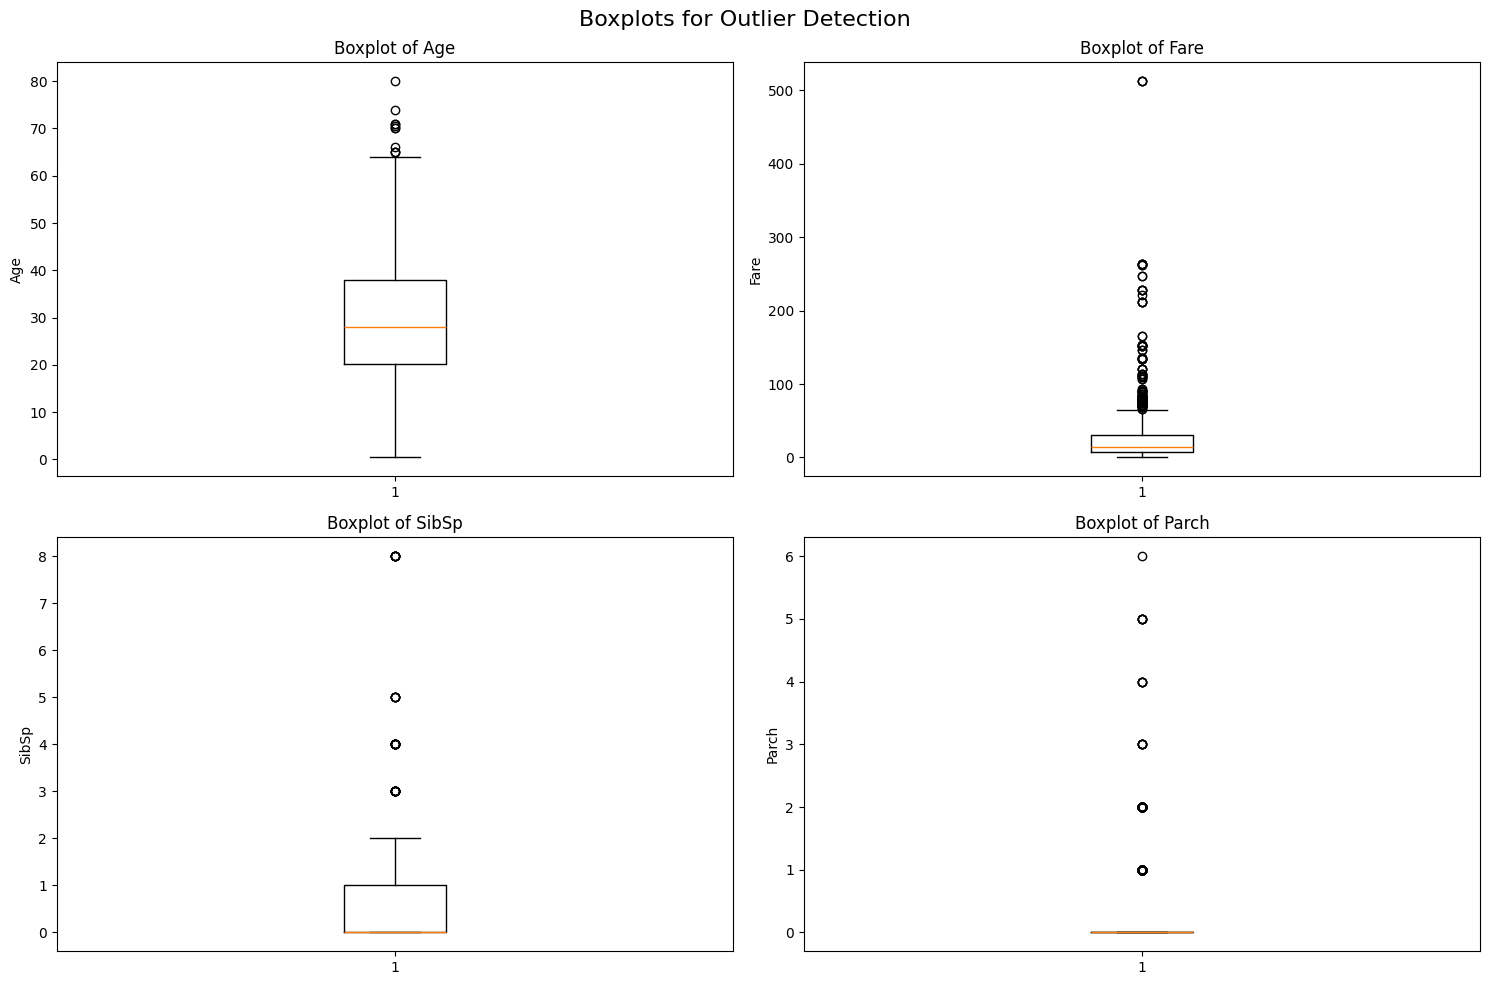


5.1 Outlier Detection Results:

Age:
  Lower bound: -6.69
  Upper bound: 64.81
  Number of outliers: 11
  Outlier percentage: 1.23%

Fare:
  Lower bound: -26.72
  Upper bound: 65.63
  Number of outliers: 116
  Outlier percentage: 13.02%

5.2 Total unique outlier rows: 126

5.3 Removing 3 extreme fare outliers (Fare > 300)
5.4 Final dataset shape after outlier removal: (888, 15)
5.5 Rows removed: 3


In [37]:
#Create subplots for boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots for Outlier Detection', fontsize=16)

# Boxplots for key numerical features (using original scale for better interpretation)
# We'll work with the original data for outlier detection
original_numerical = ['Age', 'Fare', 'SibSp', 'Parch']

for i, col in enumerate(original_numerical):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].boxplot(data[col].dropna())
    axes[row, col_idx].set_title(f'Boxplot of {col}')
    axes[row, col_idx].set_ylabel(col)

plt.tight_layout()
plt.show()

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index, lower_bound, upper_bound

print("\n5.1 Outlier Detection Results:")
outlier_indices = set()

for col in ['Age', 'Fare']:  # Focus on key numerical columns
    outlier_idx, lower, upper = detect_outliers_iqr(data, col)
    print(f"\n{col}:")
    print(f"  Lower bound: {lower:.2f}")
    print(f"  Upper bound: {upper:.2f}")
    print(f"  Number of outliers: {len(outlier_idx)}")
    print(f"  Outlier percentage: {len(outlier_idx)/len(data)*100:.2f}%")
    outlier_indices.update(outlier_idx)

print(f"\n5.2 Total unique outlier rows: {len(outlier_indices)}")

# Remove outliers (be conservative - only remove extreme outliers)
# For this dataset, we'll be more careful and only remove very extreme Fare outliers
extreme_fare_outliers = data[data['Fare'] > 300].index  # Very expensive tickets
print(f"\n5.3 Removing {len(extreme_fare_outliers)} extreme fare outliers (Fare > 300)")

# Apply outlier removal to processed data
data_final = data_processed.drop(extreme_fare_outliers).reset_index(drop=True)

print(f"5.4 Final dataset shape after outlier removal: {data_final.shape}")
print(f"5.5 Rows removed: {data_processed.shape[0] - data_final.shape[0]}")


In [39]:
print(f"\nOriginal dataset: {data.shape}")
print(f"Final dataset: {data_final.shape}")
print(f"Features in final dataset: {data_final.shape[1]}")

print("\nFinal dataset columns:")
for i, col in enumerate(data_final.columns, 1):
    print(f"{i:2d}. {col}")

print("\nFinal dataset info:")
print(data_final.info())

print("\n" + "="*60)
print("PROCESSING COMPLETE!")
print("="*60)

# Save the processed dataset
data_final.to_csv('titanic_processed.csv', index=False)
print("\nProcessed dataset saved as 'titanic_processed.csv'")

# Display first few rows of final dataset
print("\nFirst 5 rows of processed dataset:")
print(data_final.head())


Original dataset: (891, 12)
Final dataset: (888, 15)
Features in final dataset: 15

Final dataset columns:
 1. PassengerId
 2. Survived
 3. Pclass
 4. Age
 5. SibSp
 6. Parch
 7. Fare
 8. Has_Cabin
 9. Sex_encoded
10. Embarked_C
11. Embarked_Q
12. Embarked_S
13. Title_encoded
14. Family_Size
15. Is_Alone

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    888 non-null    int64  
 1   Survived       888 non-null    int64  
 2   Pclass         888 non-null    int64  
 3   Age            888 non-null    float64
 4   SibSp          888 non-null    int64  
 5   Parch          888 non-null    int64  
 6   Fare           888 non-null    float64
 7   Has_Cabin      888 non-null    int64  
 8   Sex_encoded    888 non-null    int64  
 9   Embarked_C     888 non-null    bool   
 10  Embarked_Q     888 non-null    boo